In [1]:
import Disentangler_Draft as dd
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
frequency_list_1 = [0.6369, 1.2738748 , 4.45856181, 6.36937401, 7.00631141]

In [3]:
frequency_list_2 = [0.1217, 0.24339455, 0.97357818, 1.21697273,1.46036728, 0.48678909, 1.70376182, 2.19055091]

In [4]:
frequency_list_3 = [0.7658, 1.53153077, 6.12612309, 6.89188848]

In [5]:
search_result = lk.search_targetpixelfile('TIC168789840',sector = 32)
tpf = search_result.download(quality_bitmask='default')

In [8]:
test = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 4)

## First set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   3.390177   3.331794   
1       6  63.531046 -31.922942  4882954370433202432   5.130468   3.328449   
2       7  63.501002 -31.912103  4882954645311111424   0.466061   5.371229   
3      10  63.539797 -31.905226  4882954782750061952   6.865060   6.716724   
4       8  63.504079 -31.898122  4882954645311109888   1.214921   8.041997   
5       2  63.551764 -31.923042  4882953648878696064   8.479297   3.326287   
6       1  63.538407 -31.948241  4882953545799483520   5.865126  -1.493637   
7       9  63.492912 -31.896146  4882954714030587648  -0.556296   8.409255   
8       0  63.557434 -31.946734  4882953374000789632   8.968694  -1.190590   
9      11  63.536848 -31.883303  4882954885829275904   6.782903  10.898089   
10      4  63.573764 -31.913668  4882953992476077824  12.206665   5.132685   
11     14  63.458284 -31.901152  4883001511994247040  -6.247891 

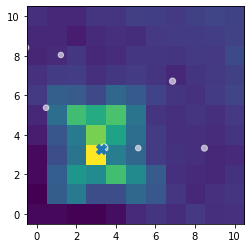

In [9]:
test.info()

## Second set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   3.390177   3.331794   
1       6  63.531046 -31.922942  4882954370433202432   5.130468   3.328449   
2       7  63.501002 -31.912103  4882954645311111424   0.466061   5.371229   
3      10  63.539797 -31.905226  4882954782750061952   6.865060   6.716724   
4       8  63.504079 -31.898122  4882954645311109888   1.214921   8.041997   
5       1  63.538407 -31.948241  4882953545799483520   5.865126  -1.493637   
6       2  63.551764 -31.923042  4882953648878696064   8.479297   3.326287   
7       9  63.492912 -31.896146  4882954714030587648  -0.556296   8.409255   
8       0  63.557434 -31.946734  4882953374000789632   8.968694  -1.190590   
9      11  63.536848 -31.883303  4882954885829275904   6.782903  10.898089   
10      4  63.573764 -31.913668  4882953992476077824  12.206665   5.132685   
11     14  63.458284 -31.901152  4883001511994247040  -6.247891 

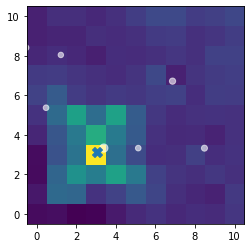

In [7]:
test.info()

## Third set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   3.390177   3.331794   
1       6  63.531046 -31.922942  4882954370433202432   5.130468   3.328449   
2       7  63.501002 -31.912103  4882954645311111424   0.466061   5.371229   
3      10  63.539797 -31.905226  4882954782750061952   6.865060   6.716724   
4       8  63.504079 -31.898122  4882954645311109888   1.214921   8.041997   
5       2  63.551764 -31.923042  4882953648878696064   8.479297   3.326287   
6       1  63.538407 -31.948241  4882953545799483520   5.865126  -1.493637   
7       9  63.492912 -31.896146  4882954714030587648  -0.556296   8.409255   
8       0  63.557434 -31.946734  4882953374000789632   8.968694  -1.190590   
9      11  63.536848 -31.883303  4882954885829275904   6.782903  10.898089   
10      4  63.573764 -31.913668  4882953992476077824  12.206665   5.132685   
11     14  63.458284 -31.901152  4883001511994247040  -6.247891 

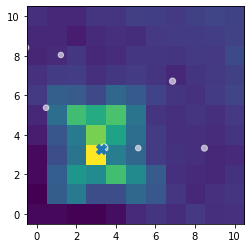

In [107]:
test.info()

In [176]:
test.result.params['x'].stderr

0.018077384219741113